# HOG (Histogram of Oriented Gradient)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Dataset

Probably you know the famous MNIST numbers dataset, for this practice you will use an upgraded version of this, the Zalando [Fashion Mnist](https://github.com/zalandoresearch/fashion-mnist) dataset.

To ease its download you can use the next commands (uncomment them):

In [7]:
!git clone https://github.com/zalandoresearch/fashion-mnist.git

fatal: destination path 'fashion-mnist' already exists and is not an empty directory.


In [8]:
#move fashion-mnist/* .
import os
import shutil

# Obtenemos la lista de todos los archivos en el directorio 'fashion-mnist'
archivos = os.listdir('fashion-mnist')

# Movemos cada archivo al directorio actual
for archivo in archivos:
    shutil.move(os.path.join('fashion-mnist', archivo), '.')

# Execute the next command on your terminal to delete the dataset folder, which should be empty.
#!rm -R fashion-mnist/
import shutil

# Elimina el directorio 'fashion-mnist' y su contenido
shutil.rmtree('fashion-mnist')

#!ls
import os

# Lista los archivos y directorios en el directorio actual
archivos = os.listdir('.')

# Imprime cada archivo/directorio
for archivo in archivos:
    print(archivo)

Error: Destination path '.\.git' already exists

In [9]:
import utils.mnist_reader as mnist_reader

In [10]:
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

In [11]:
X_train.shape

(60000, 784)

In [12]:
image = X_train[0].reshape((28, 28))

In [13]:
np.unique(image, return_counts=True)

(array([  0,   1,   2,   3,   4,   6,   7,  10,  12,  13,  15,  18,  23,
         29,  35,  36,  40,  41,  44,  48,  52,  54,  55,  56,  57,  58,
         61,  62,  64,  65,  66,  67,  69,  72,  73,  74,  75,  77,  80,
         82,  88,  92,  98,  99, 102, 106, 107, 109, 115, 117, 119, 121,
        122, 123, 127, 130, 134, 136, 141, 144, 145, 146, 150, 154, 155,
        156, 159, 161, 163, 164, 166, 167, 168, 169, 170, 171, 172, 173,
        175, 176, 177, 178, 179, 180, 181, 182, 183, 185, 186, 187, 188,
        189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 202,
        203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,
        216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228,
        229, 230, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242,
        243, 244, 245, 246, 248, 249, 250, 255], dtype=uint8),
 array([351,  11,   2,   6,   4,   3,   1,   1,   2,   1,   1,   1,   2,
          1,   1,   1,   1,   1,   2,   1,   1,   1,   1,   1

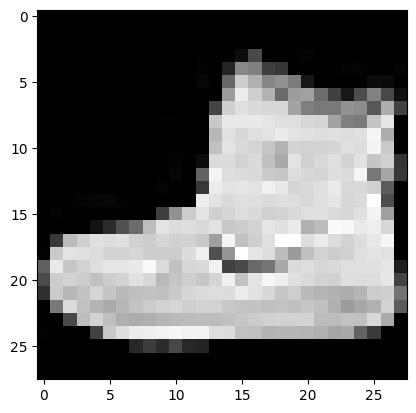

In [14]:
plt.imshow(image, cmap="gray")

## Libraries

For this task, we are going to use an alternative computer vision library named Scikit-image (also named skimage). In next section we are going to do a comparison between both libraries.

To install it, we are going to use the next command:

In [13]:
!pip install scikit-image==0.18.1

     ---------------------------------------- 0.0/12.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.2 MB ? eta -:--:--
     --------------------------------------- 0.1/12.2 MB 550.5 kB/s eta 0:00:23
     --------------------------------------- 0.1/12.2 MB 819.2 kB/s eta 0:00:15
     --------------------------------------- 0.1/12.2 MB 853.3 kB/s eta 0:00:15
      -------------------------------------- 0.2/12.2 MB 845.5 kB/s eta 0:00:15
      -------------------------------------- 0.2/12.2 MB 850.1 kB/s eta 0:00:15
     - ------------------------------------- 0.3/12.2 MB 984.6 kB/s eta 0:00:13
     - -------------------------------------- 0.4/12.2 MB 1.0 MB/s eta 0:00:12
     - -------------------------------------- 0.5/12.2 MB 1.1 MB/s eta 0:00:11
     - -------------------------------------- 0.5/12.2 MB 1.1 MB/s eta 0:00:12
     - -------------------------------------- 0.6/12.2 MB 1.1 MB/s eta 0:00:11
     -- ------------------------------------- 0.6/12.2 MB 1.

  You can safely remove it manually.


### [scikit-image](https://scikit-image.org/) vs [OpenCV](https://opencv.org/)

Skimage library is entirely implemented using python and Cython, on the other hand OpenCV is implemented uniquely with C++ and C.

Next images show you the programming languages usage in each library. Python and Java are used in OpenCV in the bindings of both languages, there are any functionality implemented using those languages.


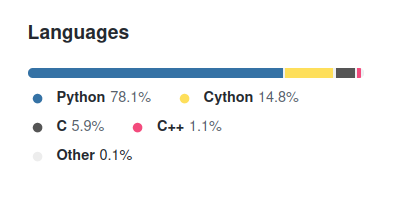

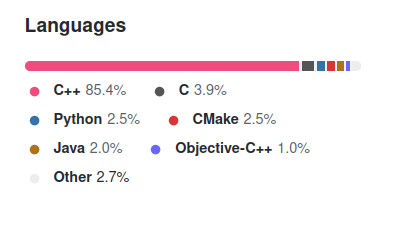



In this week class, we are interested working with low level HOG descriptions implementation, which is not possible using OpenCV.

## Algorithm

Next link contains the algorithm implementation details: https://learnopencv.com/histogram-of-oriented-gradients/

OpenCV usage example: https://carlosjuliopardoblog.wordpress.com/2018/06/28/deteccion-de-peatones-con-python-y-opencv-hog-svm/

Let's see how the algorithm works to obtain the HOG descriptors. At next link you can see how to use the skimage library to compute these image descriptors:
https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html#sphx-glr-auto-examples-features-detection-plot-hog-py

Next, you will see how to apply the algorithm with the images of the dataset we are going to use.
First step is to load the libraries:

In [14]:
from skimage.feature import hog
from skimage import data, exposure

Remember that HOG algorithm divide the image in $x \times y$ pixels cells. The dataset images has a shape of $28 \times 28$ pixels, the fact that images are such small complicate that cells division. With this shape, splitting the images by $8 \times 8$ cells we will only have $3 \times 3$ cells.

The easiest way to solve that problem is to reshape the images to a higher shape. So, we are going to multiply the images shape by 3. That way we can compute and visualize HOG descriptors nicely. If we don't do that the computed descriptors would not have too much sense. 

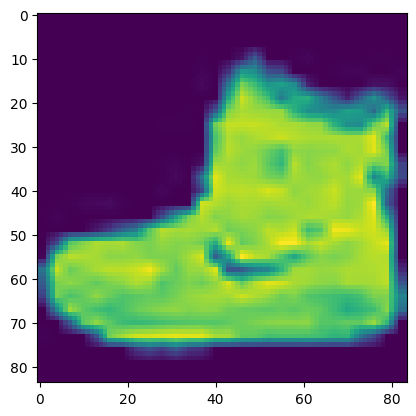

In [15]:
im_input_hog = cv2.resize(image, dsize=None, fx=3, fy=3)
im_input_hog.shape
plt.imshow(im_input_hog);

With this new shape, we can compute $10 \times 10$ cells of $8 \times 8$ pixels onto the image correctly. The code to perform that is the following:

Text(0.5, 1.0, 'Histogram of Oriented Gradients')

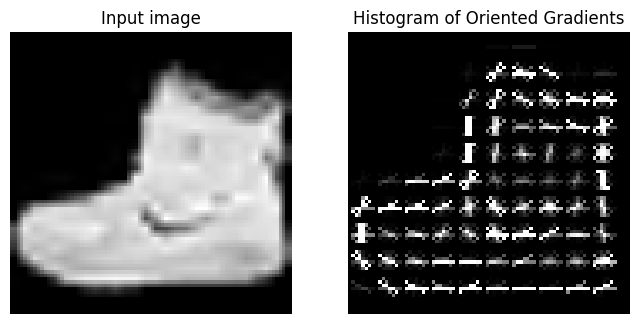

In [16]:
fd, hog_image = hog(im_input_hog, orientations=9, pixels_per_cell=(8, 8),
                    feature_vector=False,
                    cells_per_block=(1, 1), visualize=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(im_input_hog, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')

Let's consult the function definition:
- https://scikit-image.org/docs/dev/api/skimage.feature.html?highlight=hog

In [17]:
fd.shape

(10, 10, 1, 1, 9)

In [18]:
fd.squeeze().shape

(10, 10, 9)

In [19]:
fd.squeeze()[0,0, :]

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [20]:
fd.squeeze()[5,5, :]

array([0.05953277, 0.16576118, 0.37205589, 0.37205589, 0.37205589,
       0.37205589, 0.37205589, 0.37205589, 0.37205589])

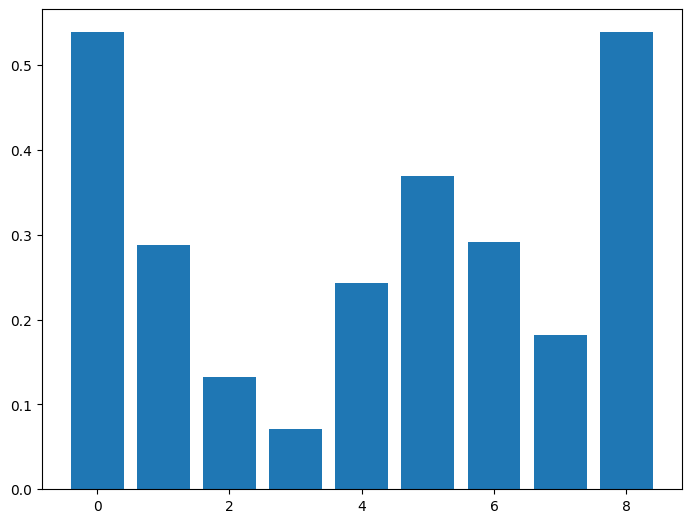

In [21]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
values = np.arange(9)
histogram = fd.squeeze()[4,5, :]
ax.bar(values,histogram);

In [22]:
histograms = fd.reshape(100,9).shape

Text(0.5, 1.0, 'Histogram of Oriented Gradients')

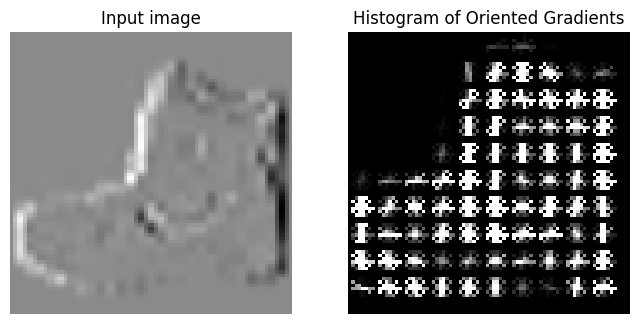

In [23]:
im_input = im_input_hog.copy()
# cv2.CV_32F
im_input = cv2.Sobel(im_input, cv2.CV_32F, 1, 0)

fd, hog_image = hog(im_input, orientations=9, pixels_per_cell=(8, 8),
                    feature_vector=False,
                    cells_per_block=(1, 1), visualize=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(im_input, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')

Text(0.5, 1.0, 'Histogram of Oriented Gradients')

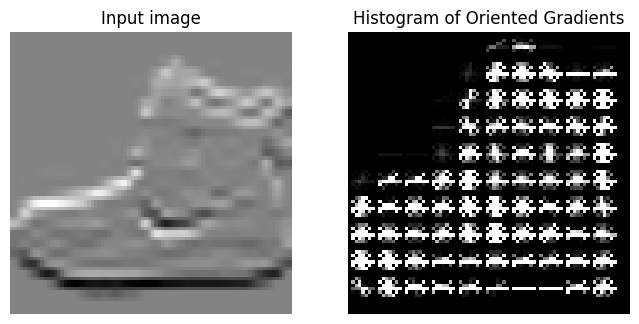

In [24]:
im_input = im_input_hog.copy()
# cv2.CV_32F
im_input = cv2.Sobel(im_input, cv2.CV_32F, 0, 1)

fd, hog_image = hog(im_input, orientations=9, pixels_per_cell=(8, 8),
                    feature_vector=False,
                    cells_per_block=(1, 1), visualize=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(im_input, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')

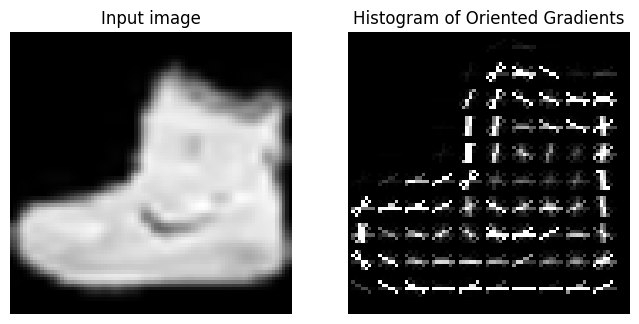

In [25]:
im_input = im_input_hog.copy()
# cv2.CV_32F
im_input = cv2.GaussianBlur(im_input, (3, 3), sigmaX=50)

fd, hog_image = hog(im_input, orientations=9, pixels_per_cell=(8, 8),
                    feature_vector=False,
                    cells_per_block=(1, 1), visualize=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(im_input, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients');

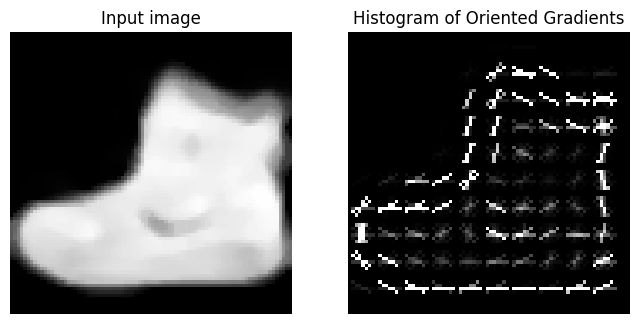

In [26]:
im_input = im_input_hog.copy()
# cv2.CV_32F
im_input = cv2.medianBlur(im_input, 7)

fd, hog_image = hog(im_input, orientations=9, pixels_per_cell=(8, 8),
                    feature_vector=False,
                    cells_per_block=(1, 1), visualize=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(im_input, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients');

## Tasks
* Analyse how the computed HOG descriptors changes after aply a filter onto the image. How this effect could be useful?


Read step 6, where talks about how to solve the problems of multiple detection of the same object.

https://www.pyimagesearch.com/2014/11/10/histogram-oriented-gradients-object-detection/

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.feature import hog
from skimage import exposure

# HOG visualisation and calculation function
def visualize_hog(image,title='Input image'):
    fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),
                        feature_vector=False,
                        cells_per_block=(1, 1), visualize=True)
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

    ax1.axis('off')
    ax1.imshow(image, cmap=plt.cm.gray)
    ax1.set_title(title)

    ax2.axis('off')
    ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
    ax2.set_title('Histogram of Oriented Gradients')
    plt.show()

    return fd, hog_image


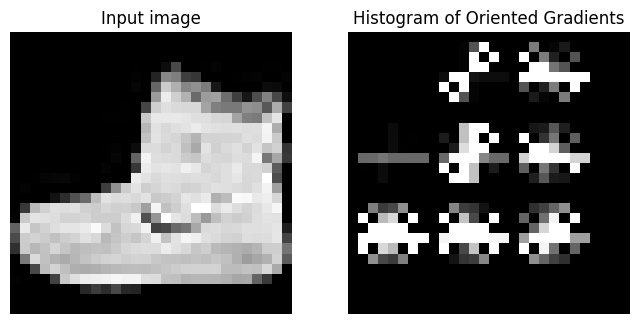

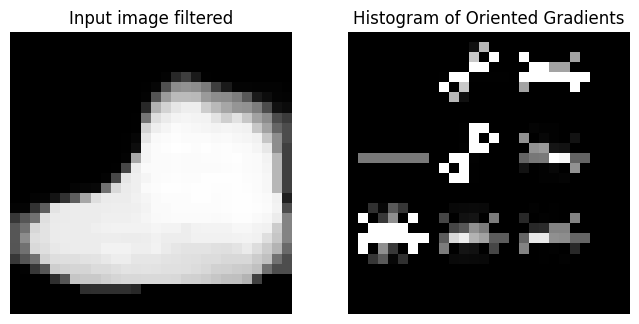

Cloning into 'fashion-mnist'...


In [16]:
image = X_train[0].reshape((28, 28)) # Same image as the teacher in first exercice

# Visualisation and analisis of the original image and it HOG descriptor
fd_original, hog_image_original = visualize_hog(image)

# Applying a median filter to the image and visualising its HOG
filtered_image = cv2.medianBlur(image, 7)
fd_filtered, hog_image_filtered = visualize_hog(filtered_image, title='Input image filtered')


## Input image
Original input image yelds input's original version. This is the image without modifications, where we apply the HOG descriptors calculation.

## Original HOG Descriptor
The HOG descriptor of the unfiltered image, yelds the representation of oriented gradients, showing multiple points of high gradient orientations that correspond to the fine edges and textures of the image. These detailed descriptors are important in order to identify the specific features of objects within the image.

## Filtered image
After applying a median filter to the image `cv2.medianBlur(image, 7)` there is a obvious reduction in image noise and texture complexity. The median filter works by replacing each pixel's value within the median value of the intensities in the neighbourhood of that pixel. This has the effect of preserving significant edges while smoothing out noise and minor variations in the image.

## Filtered HOG Descriptor
The HOG descriptor computed from the filtered image displays fewer points of high gradient orientation, indicating that the fine details have been smoothed out. The remaining highlighted gradients are those associated with more prominent and significant edges and shapes within the image.

# Difference between applying filter

* Noise reduction: Applying the median filter we reduce the noise, which in turn reduces the complexity of the HOG descriptor. This simplification can be useful in environments where the objects of interest have clear and distinct shapes, because the HOG descriptors will have less noise.

* Important features more focused: By smoothing the intesity, the median filter allows that the HOG descriptor focus on the major features of the image. That can allow a more robust object detection, as the descriptors are more representative of the objects reather that the noise.

* False positives prevention: A cleaner HOG descriptor, free of noise influence and minor details, can help to prevent the false positives during the object detection, because the model has more probabilities to detect a true positive (true objects) reather to a pattern or texture that are irrelevant.